<a id="contents"></a>

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение общей информации</a></span></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span></li><li><span><a href="#Модель-прогнозирования-оттока-пользователей" data-toc-modified-id="Модель-прогнозирования-оттока-пользователей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель прогнозирования оттока пользователей</a></span></li><li><span><a href="#Кластеризация-посетителей" data-toc-modified-id="Кластеризация-посетителей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация посетителей</a></span></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

# Прогнозирование вероятности оттока пользователей для фитнес-центров

## Описание проекта
В данном проекте мы прогнозируем вероятность оттока для каждого клиента на уровне следующего месяца. Мы формируем типичные портреты пользователей: выделяем наиболее выраженные группы и описываем их основные свойства. Затем анализируем основные признаки, наиболее сильно влияющие на отток пользователей. На основе анализа формулируем основные выводы и рекомендации по повышению качества работы с клиентами. У нас есть данные на месяц до оттока и факт оттока на определённый месяц.

Данные представлены в файле gym_churn.csv со следующими полями:

   - **Churn** — факт оттока в текущем месяце (1 - факт оттока);

Текущие поля в датасете:

 * Данные пользователя за предыдущий до проверки факта оттока месяц:
 
   - **gender** — пол;
   - **Near_Location** — проживание или работа в районе, где находится фитнес-центр;
   - **Partner** — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
   - **Promo_friends** — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
   - **Phone** — наличие контактного телефона;
   - **Age** — возраст;
   - **Lifetime** — время с момента первого обращения в фитнес-центр (в месяцах);

*  Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

   - **Contract_period** — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
   - **Month_to_end_contract** — срок до окончания текущего действующего абонемента (в месяцах);
   - **Group_visits** — факт посещения групповых занятий;
   - **Avg_class_frequency_total** — средняя частота посещений в неделю за все время с начала действия абонемента;
   - **Avg_class_frequency_current_month** — средняя частота посещений в неделю за предыдущий месяц;
   - **Avg_additional_charges_total** — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон;

## Изучение общей информации

In [1]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# библиотеки для машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# загружаем файлы
path = '/datasets/' #путь яндекса
df = pd.read_csv(path + 'gym_churn.csv') 

In [3]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


В данных присутствуют все признаки из описания. Пропусков нет. Типы данных указаны верно. Большинство переменных имеет бинарные значения 0 или 1, что означает "нет" или "да" соответственно.

In [5]:
# проверим на дубликаты
df.duplicated().sum()

0

Дубликатов нет.

<a href="#contents">к оглавлению</a>

## Исследовательский анализ данных (EDA)

Взглянем на описательную статистику переменных.

In [6]:
# описательная статистика
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


- Из среднего показателя оттока видим, что примерно для 27% посетителей зафиксирован факт оттока;
- Мужчины и женщины примерно одинаково представлены в данных;
- Около 85% посетителей проживают или работают в районе фитнес-центра;
- Около 49% посетителей работают в компаниях-партнерах;
- Около 31% посетителей пришли в рамках акции "приведи друга";
- Около 90% посетителей имеют контактный телефон; 
- Около 41% посетителей посещают групповые занятия;
- Средняя суммарная выручка от других услуг фитнес-центра - 147;
- Средний возраст посетителей - 29 лет;
- Средняя длительность абонемента - 4.7 месяцев;
- Среднее время с момента первого обращения в фитнес-центр - 3.7 месяцев; 
- Средний срок до окончания текущего действующего абонемента - 4.3 месяца;
- Средняя частота посещений в неделю за все время с начала действия абонемента - 1.9 раз;
- Средняя частота посещений в неделю за предыдущий месяц - 1.8 раз. 

Следующие признаки имеют высокое стандартное отклонение по сравнению со средним: 
- суммарная выручка от других услуг фитнес-центра;
- срок до окончания текущего действующего абонемента;
- длительность абонемента, частота посещений в неделю за все время с начала действия абонемента;
- частота посещений в неделю за предыдущий месяц.

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток (1) и тех, кто остался (0).

In [7]:
# средние значения признаков по группам 
df.groupby('Churn').mean().T

Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


Мы видим следующие отличительные признаки среди тех, кто **остался** - **Churn=0**:
- доля посетителей, живущих или работающих в районе фитнес-центра, больше;
- доля посетителей, являющихся сотрудниками компаний-партнеров, больше;
- доля посетителей, пришедших по акции "приведи друга", больше;
- средняя длительность абонемента больше;
- доля посетителей, посещающих групповые занятия, больше;
- средний возраст больше;
- средний срок до окончания текущего действующего абонемента больше;
- среднее время с момента первого обращения в фитнес-центр больше;
- средняя частота посещений в неделю за все время с начала действия абонемента больше;
- средняя частота посещений в неделю за предыдущий месяц больше.

То есть у тех, кто остался, все средние показатели выше.

Нарисуем гистограммы распределения признаков для двух групп.

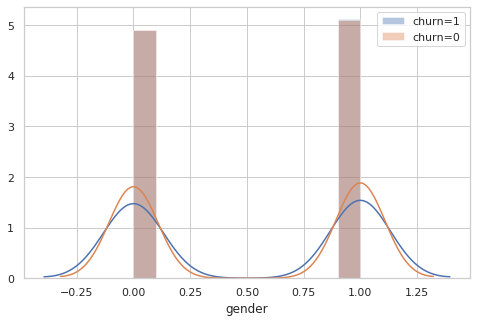

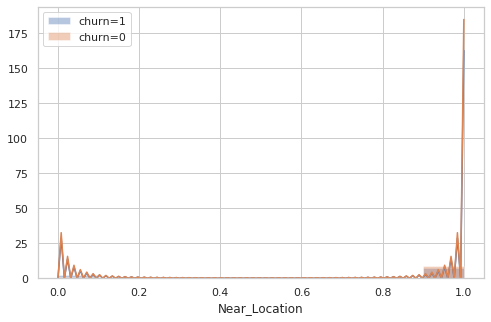

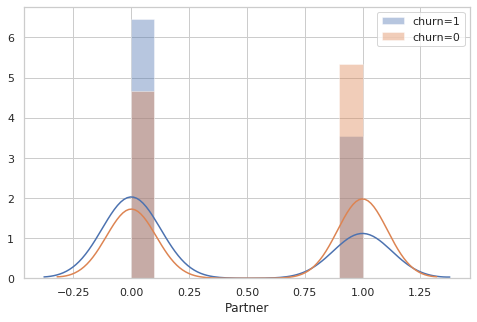

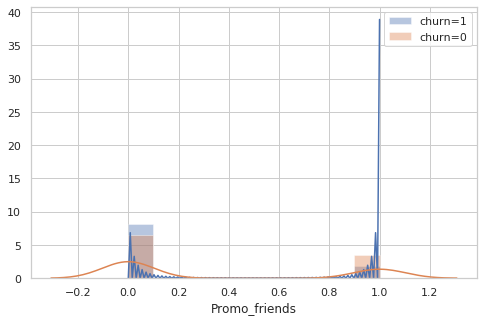

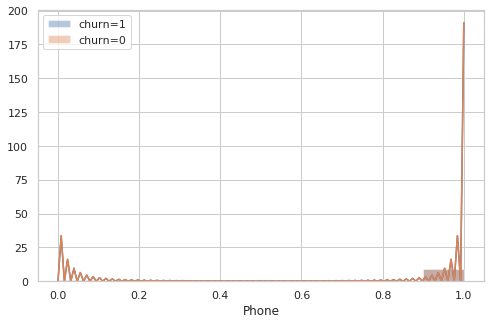

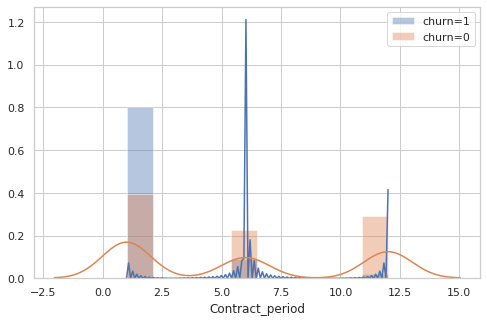

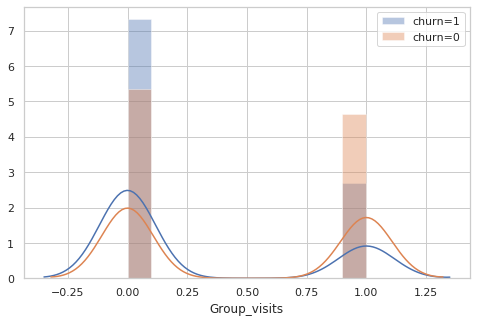

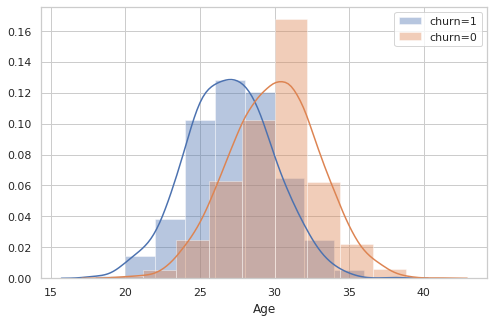

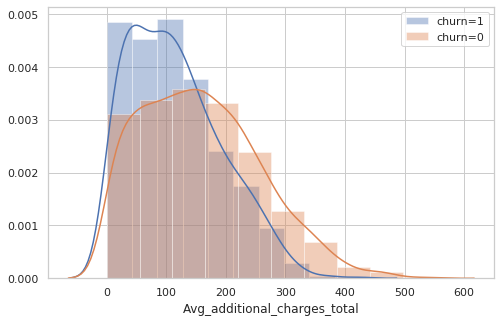

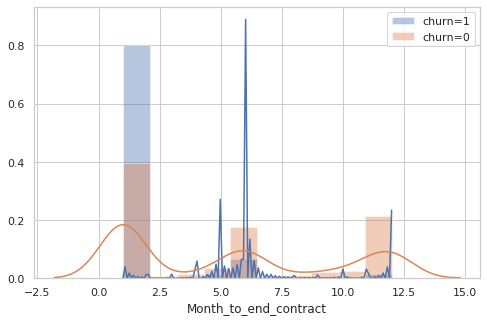

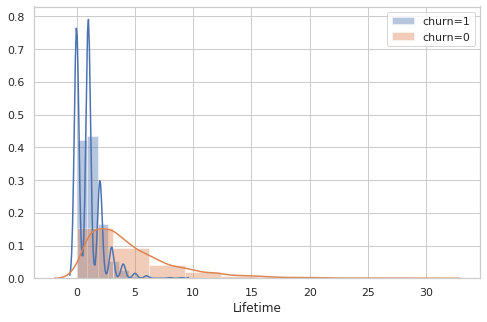

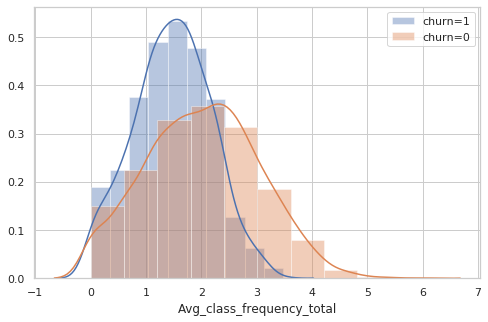

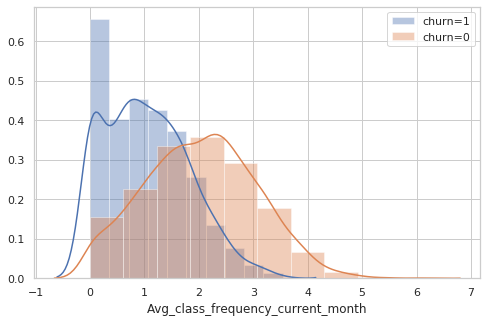

In [8]:
# диаграммы распределения
for feature in df.drop(['Churn'], axis=1).columns:
    sns.set(style="whitegrid")
    plt.figure(figsize=(8,5))
    sns.distplot(df[df['Churn']==1][feature], bins=10, label="churn=1")
    sns.distplot(df[df['Churn']==0][feature], bins=10, label="churn=0")
    plt.legend() 
    plt.show()

Для посетителей, ушедших в отток характерны меньшие значения по всем числовым признакам. Также по бинарным признакам значение 0 ("нет") больше характерно для тех, кто ушел в отток. В целом графики подтверждают ранее сделанные выводы.

Построим матрицу корреляций и тепловую карту.

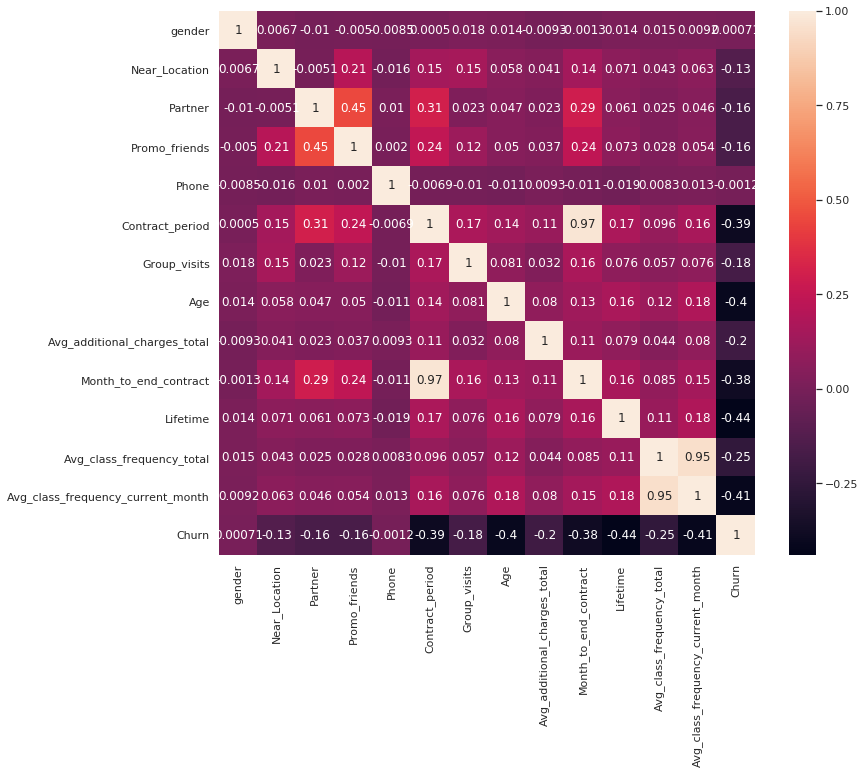

In [9]:
#вычисляем матрицу корреляций
cm = df.corr() 
fig, ax = plt.subplots(figsize=(12, 10))

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot = True) 
plt.show()

Мы можем заметить, что признаки не так сильно коррелируют с целевой переменной. Почти все признаки имеют отрицательную корреляцию с целевой переменной. Отрицательная корреляция с целевой переменной больше или равная 40% наблюдается у признаков: средняя частота посещений в неделю за предыдущий месяц, время с момента первого обращения в фитнес-центр и возраст. 

Среди признаков высокая корреляция (выше 0.8) наблюдается между признаками: Month_to_end_contract и contract_period; 'Avg_class_frequency_current_month' и 'Avg_class_frequency_total'. Действительно, срок до окончания текущего абонемента напрямую зависит от длительности абонемента, и также средняя частота посещений в неделю за все время зависит от средней частоты посещений в неделю за предыдущий месяц. При необходимости можно отбросить по одному признаку из каждой пары.

<a href="#contents">к оглавлению</a>

## Модель прогнозирования оттока пользователей

Построим модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце. Разделим выборку на обучающую и валидационную в соотношении 80/20. Применим два алгоритма - логистическая регрессия и случайный лес. Оценим метрики *accuracy*, *precision* и *recall* для обеих моделей на валидационной выборке. Стоит отметить, что стандартизировать данные для логистической регрессии и случайного леса это делать необязательно. 

In [10]:
# разделим данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

In [11]:
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

In [12]:
# определим функцию, которая будет выводить метрики
def print_metrics(y_true, y_pred, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

Модель логистической регрессии:

In [13]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0, solver='liblinear')

# обучим модель
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# воспользуемся обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:, 1]

In [15]:
# коэффициенты логистической регрессии для всех признаков 
lr_model.coef_ 

array([[ 4.96318288e-02,  9.39218184e-02, -2.71059116e-03,
        -3.20300307e-01,  4.68146548e-01, -1.94968688e-01,
        -7.08444955e-01, -1.95833757e-01, -4.85550193e-03,
        -7.85822960e-02, -9.07724882e-01,  3.22844085e+00,
        -3.88004738e+00]])

In [16]:
# нулевой коэффициент
lr_model.intercept_

array([8.37570427])

In [17]:
X_test.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
3025,0,1,1,1,1,1,1,27,61.347169,1.0,1,1.230596,0.805638
31,0,1,0,0,1,12,1,32,87.856139,12.0,1,0.000000,0.000000
2017,1,1,0,0,1,12,1,25,243.128113,12.0,4,1.021601,0.935325
55,0,1,1,1,0,1,0,30,194.669178,1.0,4,1.893015,1.900943
2096,1,1,1,0,1,1,0,32,101.187972,1.0,5,1.837830,1.804372


Исходя из величин коэффициентов, наибольшее влияние имеют признаки Promo_friends, Phone, Contract_period, Group_visits, Age, Lifetime, Avg_class_frequency_total, Avg_class_frequency_current_month. Все коэффициенты отрицательные, кроме Gender, Near_Location, Phone и Avg_class_frequency_total. Некоторые результаты бессмысленны. Вероятно, проблема - мультиколлинеарность, как мы выяснили раннее из корреляционного анализа.

Удалим дублирующие признаки Month_to_end_contract и Avg_class_frequency_total, и снова применим логистическую регрессию.

In [18]:
X_train_filt = X_train.drop(['Month_to_end_contract', 'Avg_class_frequency_total'], axis=1)

In [19]:
X_test_filt = X_test.drop(['Month_to_end_contract', 'Avg_class_frequency_total'], axis=1)

In [20]:
# зададим алгоритм для второй модели логистической регрессии
lr_model_filt = LogisticRegression(random_state=0, solver='liblinear')

# обучим модель
lr_model_filt.fit(X_train_filt, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# воспользуемся обученной моделью, чтобы сделать прогнозы
lr_predictions_filt = lr_model_filt.predict(X_test_filt)
lr_probabilities_filt = lr_model_filt.predict_proba(X_test_filt)[:, 1]

In [22]:
# коэффициенты второй логистической регрессии для всех признаков 
lr_model_filt.coef_ 

array([[ 0.11672072,  0.08034751,  0.0256596 , -0.33116978,  0.23551876,
        -0.2812108 , -0.65254483, -0.20081566, -0.00484481, -0.91423217,
        -1.07076784]])

In [23]:
# нулевой коэффициент
lr_model_filt.intercept_

array([9.76658269])

In [24]:
X_train_filt.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_current_month
2702,1,1,1,0,1,6,1,31,56.345649,3,0.000000
1709,1,1,0,0,1,12,1,25,161.385863,2,3.094860
907,0,1,0,1,1,6,1,30,175.561159,2,1.199163
1991,0,1,1,1,1,6,1,25,49.844578,0,2.513288
3680,0,1,0,1,0,12,1,29,148.153962,2,1.430624


Исходя из величины коэффициентов, наибольшее влияние также имеют признаки Promo_friends, Phone, Contract_period, Group_visits, Age, Lifetime, Avg_class_frequency_current_month. Все коэффициенты отрицательные, кроме Phone, Gender, Near_Location и Partner.
 
Нужно помнить, что мы не можем полностью полагаться на результаты линейной регрессии, чтобы объяснить и доказать причинно-следственную связь между признаком и целевой переменной.

Теперь построим модель случайного леса с числом деревьев n_estimators = 100:

In [25]:
# зададим алгоритм для модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0) 

# обучим модель случайного леса
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
# воспользуемся обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test) 
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

Посмотрим на значимость признаков в модели случайного леса в убывающем порядке.

In [27]:
# создадим таблицу с важностью признаков
fi_df = pd.DataFrame(
    data={'feature': X.columns, 'importance': rf_model.feature_importances_}
)
fi_df.sort_values('importance', ascending=False)
print(fi_df)

                              feature  importance
0                              gender    0.012293
1                       Near_Location    0.009924
2                             Partner    0.012099
3                       Promo_friends    0.010499
4                               Phone    0.006511
5                     Contract_period    0.067406
6                        Group_visits    0.016090
7                                 Age    0.121477
8        Avg_additional_charges_total    0.088327
9               Month_to_end_contract    0.072941
10                           Lifetime    0.270336
11          Avg_class_frequency_total    0.135955
12  Avg_class_frequency_current_month    0.176142


Видим, что наиболее важные признаки - Age, Lifetime,  Avg_class_frequency_total и Avg_class_frequency_current_month.

Теперь применим случайный лес на отфильтрованной выборке.

In [28]:
# зададим алгоритм для модели на основе алгоритма случайного леса
rf_model_filt = RandomForestClassifier(n_estimators = 100, random_state=0) 

# обучим модель случайного леса
rf_model_filt.fit(X_train_filt, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
# воспользуемся обученной моделью, чтобы сделать прогнозы
rf_predictions_filt = rf_model_filt.predict(X_test_filt) 
rf_probabilities_filt = rf_model_filt.predict_proba(X_test_filt)[:, 1]

Посмотрим снова на значимость признаков в модели случайного леса в убывающем порядке.

In [30]:
# создадим таблицу с важностью признаков
fi_df_filt = pd.DataFrame(
    data={'feature': X_train_filt.columns, 'importance': rf_model_filt.feature_importances_}
)
fi_df_filt.sort_values('importance', ascending=False)
print(fi_df_filt)

                              feature  importance
0                              gender    0.016574
1                       Near_Location    0.013045
2                             Partner    0.016854
3                       Promo_friends    0.013606
4                               Phone    0.008662
5                     Contract_period    0.110377
6                        Group_visits    0.020768
7                                 Age    0.144186
8        Avg_additional_charges_total    0.122384
9                            Lifetime    0.317762
10  Avg_class_frequency_current_month    0.215782


Видим, что наиболее важные признаки теперь - Contract_period, Age, Avg_additional_charges_total, Lifetime и Avg_class_frequency_current_month.

Выведем метрики для четырех моделей.

In [31]:
# выведем метрики для модели логистической регрессии
print_metrics(
    y_test,
    lr_predictions,
   title='Метрики для модели логистической регрессии:'
)

Метрики для модели логистической регрессии:
	Accuracy: 0.93
	Precision: 0.89
	Recall: 0.84


In [32]:
# выведем метрики для второй модели логистической регрессии 
print_metrics(
    y_test,
    lr_predictions_filt,
   title='Метрики для второй модели логистической регрессии:'
)

Метрики для второй модели логистической регрессии:
	Accuracy: 0.91
	Precision: 0.85
	Recall: 0.82


In [33]:
# выведем метрики для модели случайного леса
print_metrics(
     y_test,
    rf_predictions,
   title='Метрики для модели случайного леса:'
)

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83


In [34]:
# выведем метрики для второй модели случайного леса
print_metrics(
     y_test,
    rf_predictions_filt,
   title='Метрики для второй модели случайного леса:'
)

Метрики для второй модели случайного леса:
	Accuracy: 0.90
	Precision: 0.85
	Recall: 0.77


В целом обе модели хороши. Однако логистическая регрессия имеет более высокие значения всех метрик. Среди двух логистических регрессий первая показала более высокие значения метрик. Среди двух моделей случайного леса, первая показала более высокие значения метрик.

<a href="#contents">к оглавлению</a>

## Кластеризация посетителей

Выделим несколько наиболее выраженных групп клиентов. Для этого нарисуем дендрограмму. Затем обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Число кластеров возьмем n = 5.

In [35]:
# стандартизируем данные
sc = StandardScaler()
X_st = sc.fit_transform(X)

In [36]:
# создадим таблицу связок
linked = linkage(X_st, method = 'ward') 

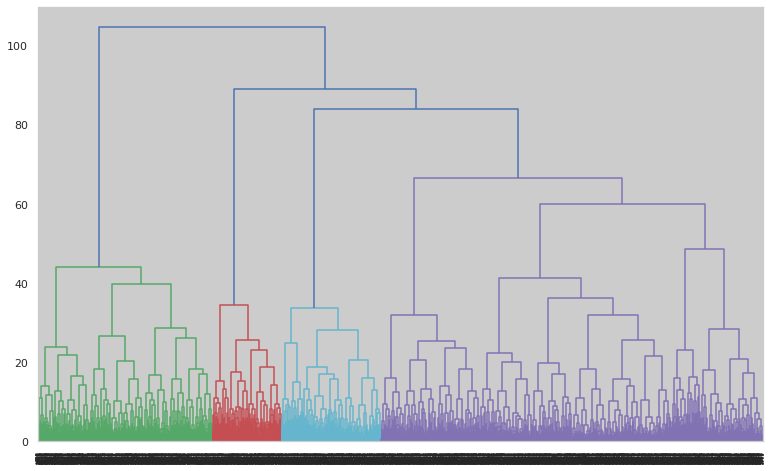

In [37]:
# нарисуем дендрограмму
plt.figure(figsize=(13, 8))  
dendrogram(linked, orientation='top')
plt.show() 

Предложенное оптимальное число кластеров 4 — четыре разных цвета на графике. Можно сиреневый кластер разбить еще на два кластера, тогда в итоге получим 5 разных кластеров.

In [38]:
# задаём модель K-means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state=0)

In [39]:
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(X_st)

In [40]:
# сохраняем метки кластера в поле нашего датасета
X['cluster_km'] = labels

In [41]:
X.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,3


In [42]:
# выведем статистику по средним значениям признаков по кластеру
X.groupby('cluster_km').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
cluster_km,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473


Можем сделать некоторые наблюдения по средним значениям. Все кластеры имеют примерно одинаковый средний возраст посетителей - 28-30 лет. Доля мужчин и женщин примерно одинакова по всем кластерам. Кластеры 0, 1 и 4 имеют высокие показатели по всем количественным признакам. Кластеры 1 и 4 выделяются из всех, так как имеют большие средние значения/доли почти по всем признакам.

Построим распределения признаков по кластерам. Для бинарных переменных - столбчатые диаграммы, а для непрерывных - боксплоты.

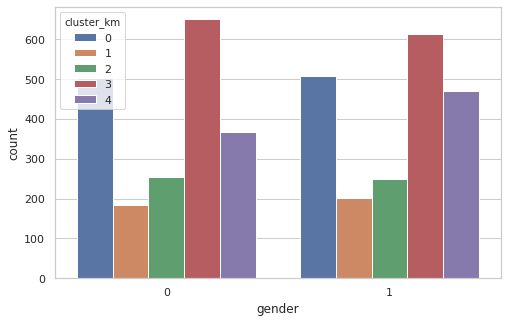

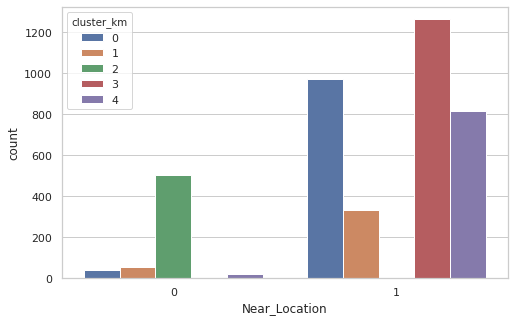

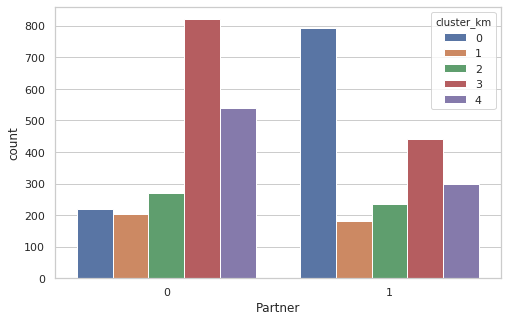

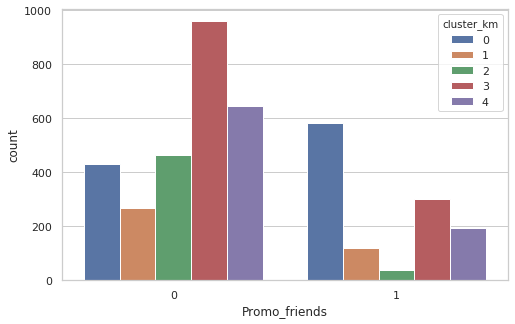

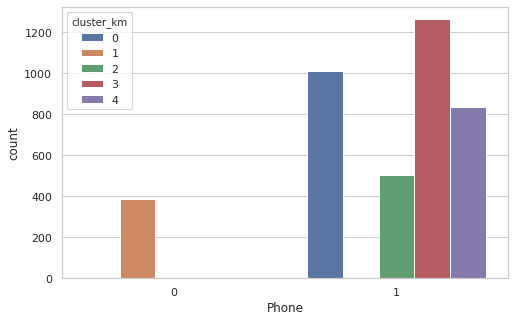

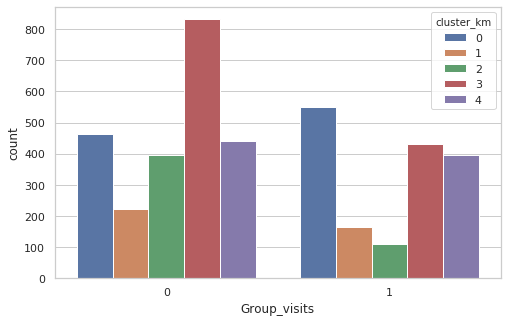

In [43]:
# построим столючатые диаграммы с подсчетом для бинарных признаков по кластерам 
for feature in X[['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits']].columns:
    sns.set(style="whitegrid")
    plt.figure(figsize=(8,5))
    sns.countplot(X[feature], hue=X['cluster_km'])
    plt.show()

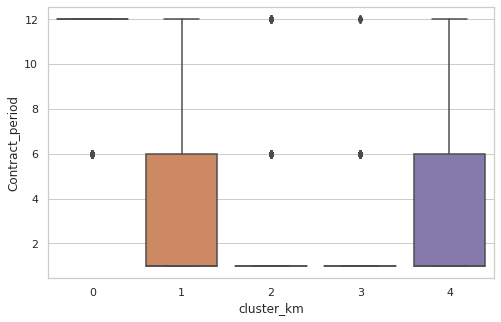

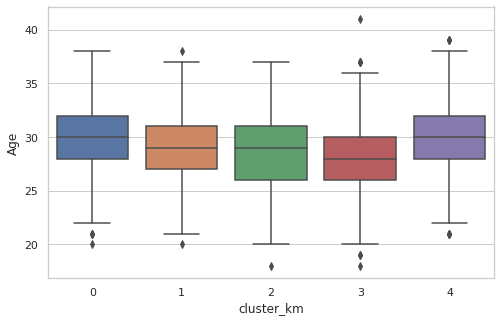

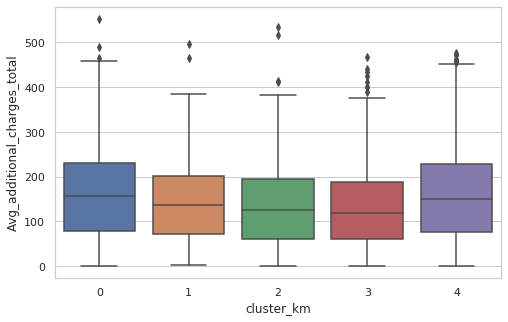

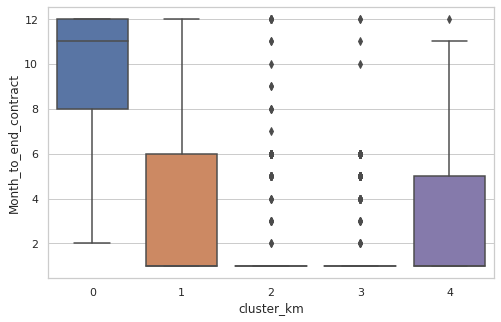

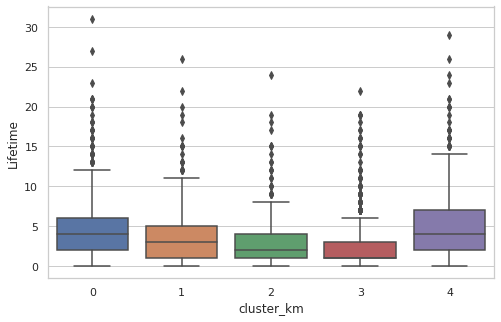

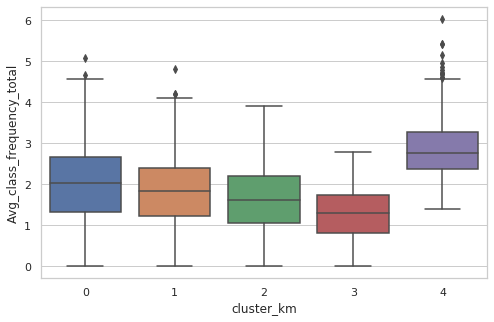

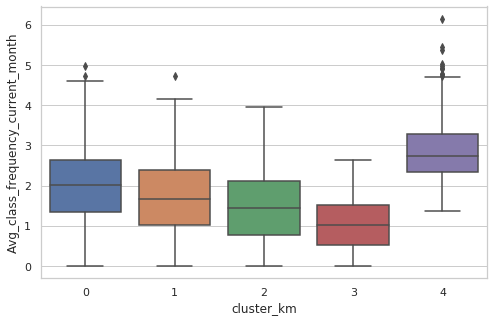

In [44]:
# построим боксплоты для непрерывных признаков по кластерам 
for feature in X.drop(['cluster_km', 'gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits'], axis=1).columns:
    sns.set(style="whitegrid")
    plt.figure(figsize=(8,5))
    sns.boxplot(X['cluster_km'], X[feature])
    plt.show()

Можем сделать некоторые отличительные наблюдения:
* для кластеров 0 и 4 характерен возраст 30+;
* для кластера 3 характерен возраст 25-28 лет;
* для кластеров 0 и 4 характерна более высокая средняя частота посещений в неделю за предыдущий месяц и с начала абонемента;
* для кластера 3 характерна низкая средняя частота посещений в неделю за предыдущий месяц и с начала абонемента;
* для кластеров 0 и 4 характерен более высокий жизненный цикл абонемента;
* для кластера 3 характерен низкий жизненный цикл абонемента;
* только для кластера 3 доля, проживающих или работающих в районе фитнес-центра, составляет 100%;
* в кластере 2 нет проживающих или работающих в районе фитнес-центра;
* кластер 3 имеет самый короткий средний срок абонемента;
* кластер 0 имеет самый большой средний срок абонемента;
* кластеры 0 и 4 имеют высокую долю тех, кто посещает групповые занятия;
* кластеры 0 и 1 имеют самую большую долю тех, кто пришел по акции "приведи друга";
* кластер 2 имеют самую маленькую долю тех, кто пришел по акции "приведи друга";
* кластер 0 имеет самую большую долю тех, кто работает в компаниях-партнерах. 

Для каждого полученного кластера посчитаем долю оттока. 

In [45]:
# добавим новый столбец с метками кластера в основную таблицу
df['cluster_km'] = labels

In [46]:
# доля оттока для каждого кластера
df.groupby('cluster_km')[['Churn']].mean()

,Churn
cluster_km,
0,0.027695
1,0.267532
2,0.443564
3,0.514263
4,0.068100


Видим, что кластер 3 наиболее склонен к оттоку, с долей превышающей 50% посетителей. Затем идут кластеры 2 и 1 с долями 44% и 26% соответственно. Доля оттока в кластере 4 составляет 6%. Наиболее лояльные посетители принадлежат к кластеру 0, с долей оттока всего 2%.

## Выводы и рекомендации

Мы проанализировали данные о посетителях сети фитнес-клубов с целью прогнозирования оттока клиента на уровне следующего месяца. Были использованы следующие методы машинного обучения: с учителем - логистическая регрессия и случайный лес для предсказания факта оттока; и без учителя - алгоритм K-Means для сегментирования клиентов. Для регрессии и случайного леса мы не стандартизировали данные, так как это необязательно для этих моделей.

Логистическая регрессия показала значения метрик accuracy, precision и recall чуть лучше случайного леса. Перед использованием алгоритма K-Means мы нарисовали дендрограмму, которая выделила 4-5 кластеров. В алгоритм K-Means мы заложили число кластеров 5.

По результатам логистической регрессии были выделены признаки с наибольшими коэффициентами - Promo_friends, Contract_period, Group_visits, Age, Lifetime, Avg_class_frequency_current_month. Эти коэффициенты отрицательные.

По результатам модели случайного леса, наиболее важные признаки - Contract_period, Age, Avg_additional_charges_total, Lifetime и Avg_class_frequency_current_month.

По результатам кластеризации клиентов выяснили, что кластер 3 наиболее склонен к оттоку, с долей превышающей 50% посетителей. Затем идут кластеры 2 и 1 с долями 44% и 26% соответственно. Доля оттока в кластере 4 составляет 6%. А вот наиболее лояльные посетители принадлежат к кластеру 0, с долей оттока всего 2%. А теперь выделим наиболее выраженные отличия в признаках:

* для кластеров 0 и 4 характерен возраст 30+;
* для кластера 3 характерен возраст 25-28 лет;
* для кластеров 0 и 4 характерна более высокая средняя частота посещений в неделю за предыдущий месяц и с начала абонемента;
* для кластера 3 характерна низкая средняя частота посещений в неделю за предыдущий месяц и с начала абонемента;
* для кластеров 0 и 4 характерен более высокий жизненный цикл абонемента;
* для кластера 3 характерен низкий жизненный цикл абонемента;
* только для кластера 3 доля, проживающих или работающих в районе фитнес-центра, составляет 100%;
* в кластере 2 нет проживающих или работающих в районе фитнес-центра;
* кластер 3 имеет самый короткий средний срок абонемента;
* кластер 0 имеет самый большой средний срок абонемента;
* кластеры 0 и 4 имеют высокую долю тех, кто посещает групповые занятия;
* кластеры 0 и 1 имеют самую большую долю тех, кто пришел по акции "приведи друга";
* кластер 2 имеют самую маленькую долю тех, кто пришел по акции "приведи друга";
* кластер 0 имеет самую большую долю тех, кто работает в компаниях-партнерах. 

<div class="alert alert-info">
    <strong>Исходя из вышеперечисленных выводов, рекомендуем следующие меры по работе с клиентами:</strong> 
   
**1. Промо-акции и система вознаграждения лояльных клиентов**. Для мотивации клиентов оставаться лояльными можно устраивать акции и вознаграждать их. Например, дарить в подарок 1-2 занятия каждый месяц, или же предоставлять бесплатное пробоное занятие по всем имеющимся направлениям в клубе. Также можно дарить посещения в СПА и баню, спорт-питание, например.

**2. Вовлечение клиентов в групповые занятия**. Групповые занятия создают дух команды, а для кого-то дух соперничества. Но в целом групповые занятия мотивируют на посещения больше, чем одиночные занятия с тренером. Можно расширить перечень групповых занятий, и даже провести опрос среди клиентов, какие групповые занятия были бы им интересны.

**3. Увеличение сети компаний-пертнеров**. Из анализа мы поняли, что сотрудники компаний-партнеров лояльные клиенты. Главный фактор - это - предоставление скидок.
</div>

<a href="#contents">к оглавлению</a>